### Instituto Tecnológico de Costa Rica (ITCR)
### Escuela de Computación
### Curso: Inteligencia Artificial
 
### Segunda tarea programada 2022-I


Profesora: María Auxiliadora Mora

Medio de entrega: Por medio del TEC-Digital.

Entregables: Un archivo en Jupyter ( .IPYNB ). 

Modo de trabajo: Individual o en grupos de máximo dos personas.

---


Objetivo: En el presente trabajo se repasarán conceptos elementales respecto a optimización, aprendizaje profundo y regresión.


**Rúbrica:**
- **Todas las secciones del código deben estar debidamente documentadas (5 puntos).**
- **Deben incluir las referencias del material utilizado (3 puntos)**
- **No deben tener errores de redacción u ortografía. (2 puntos)**
- **El resto de la rúbrica está incluida en las definición de los ejercicios.**

---


# Estudiantes
Roy Chavarría Garita - 2018034199 \
Jonder Hernández Gutiérrez - 2018203660

In [1]:
#Bibliotecas
from matplotlib import pyplot
import numpy as np
import math
import matplotlib.pyplot as plt
from math import e
import torch
import plotly.graph_objects as go

from numpy import vstack
from numpy import sqrt
from numpy import array
from pandas import read_csv, notnull

# Pregunta 3
  # Gráficas estadísticas
import seaborn as sns
import pandas as pd

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch import Tensor
from torch.nn import Linear
from torch.nn import Sigmoid
from torch.nn import Module
from torch.optim import SGD
from torch.nn import MSELoss
from torch.nn.init import xavier_uniform_

#Graficar en 3d - pregunta #1
from sympy import symbols
from sympy.plotting import plot3d



# Linear regression
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

## Pregunta 1. Graficación

---

Para las siguientes:

Función 1:

$f_{1}\left(x_{1},x_{2}\right)=\left(x_{1}-0.7\right)^{2}+\left(x_{2}-0.5\right)^{2}$


Función 2: 

$f_{2}\left(x_{1},x_{2}\right)=x_{1}e^{\left(-x_{1}^{2}-x_{2}^{2}\right)}$


Realice lo siguiente (5 puntos):

En Python, cree una función que le permita graficar las funciones anteriores. Utilizando la función en Python genere dos gráficos, uno para cada función $𝑓_{1}$ y  $𝑓_{2}$. 

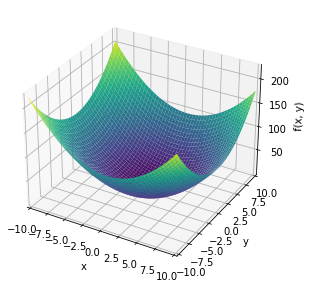

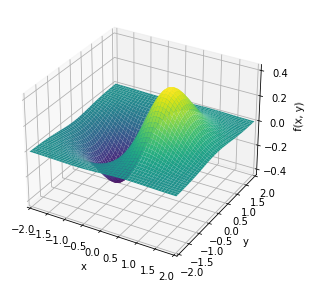

In [2]:
# Función 1.
def f1(x,y):
    return (x-0.7)**2 + (y - 0.5)**2
# Función 2.
def f2(x,y):
    return x*e**((-x**2)-(y**2))


def graficar(f,rx, ry):
  # Entradas:
  # f es la función a graficar
  # rx y ry son los rangos de las variables X y Y respectivamente 

  #Gráfico utilizando la biblioteca sympy
  plot3d(f, (x, rx[0], rx[1]), (y, ry[0], ry[1]))

#Asigno simbolos a las variables
x , y = symbols('x y')

#Gráfico las dos funciones
graficar(f1(x,y),[-10,10], [-10,10])
graficar(f2(x,y),[-2, 2], [-2, 2])

## Pregunta 2. Optimización
---

**a) Vector gradiente  (5 puntos)**

Calcule el vector gradiente $\nabla f$ para la siguiente función multi-variable $f: \mathbb{R}^2\rightarrow\mathbb{R}$. Además, evalúelo en $\begin{bmatrix}1\\1\end{bmatrix}$ y $\begin{bmatrix}-1\\-1\end{bmatrix}$. 

--No se require programación en python--.

 - $f_3(x,y) = x^4+y^3+5x^2y^3$
 


## Ecuación
\begin{equation}
Sea:
f(x) = x^{4} + y^{3} + 5x^{2}y^{3}
\end{equation}

### Derivada parcial con respecto a x
\begin{equation}
f(x) = 
\frac{\textrm{∂}f}{\textrm{∂}x}= 4x^{3} + 10xy^{3}
\end{equation}

#### Evaluación en  (1, 1) 
\begin{equation}
f_1(p) = 4*1^{3} + 10*1*1^{3} = 14
\end{equation}

#### Evaluación en  (-1, -1) 
\begin{equation}
f_2(p)= 4*-1^{3} + 10*-1*-1^{3} = 6
\end{equation}


### Derivada parcial con respecto a y
\begin{equation}
f(x) = 
\frac{\textrm{∂}f}{\textrm{∂}x}= 3y^{2} + 15x^{2}y^{2}
\end{equation}

#### Evaluación en  (1, 1) 
\begin{equation}
f_1(y) = 3*1^{2} + 15*1^{2}*1^{2} = 18
\end{equation}

#### Evaluación en  (-1, -1) 
\begin{equation}
f_2(y) = 3*-1^{2} + 15*-1^{2}*-1^{2} = 18
\end{equation}


## Vectores gradientes resultantes

\begin{equation}
\Delta f(p)_1 = <14, 18> \\
\Delta f(p)_2 = <6, 18>
\end{equation}


**b) Descenso de gradiente (10 puntos)**

**Sea la función:** 

\begin{equation}
f_4\left(\overrightarrow{x}\right)=(x-0.7)^{2}+(y-0.5)^{2},
\end{equation}


**Implemente el algoritmo de descenso de gradiente para $f_4(x)$ en la función en Python denominada: (8 puntos)**

$$funcion\_gradient\_descent \left(learning\_rate, max\_iters, starting\_point, f\_function,f\_gradient, precision\right)$$

donde los parámetros corresponden a:

* learning_rate: tasa_aprendizaje o el $\alpha$
* max_iters: es el máximo número de iteraciones a ejecutar
* starting_point: es el vector con los dos valores iniciales [x,y]
* f_function: fución a optimizar
* f_gradient: gradiente de la función a optimizar.
* precision: es el valor mínimo para un cambio entre iteración. 

Despliegue y analice los resultados (2 puntos).


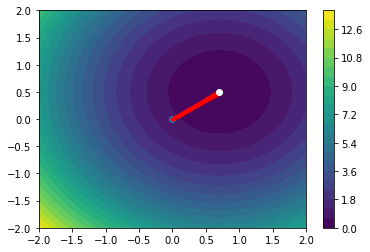

In [3]:
f_function = lambda vec : (vec[0]-0.7)**2 + (vec[1]-0.5)**2
f_gradient = lambda vec1,vec2 : f_function(vec1) - f_function(vec2)

def funcion_gradient_descent(learning_rate, max_iters, starting_point, f_function, f_gradient, precision):
  res = 200
  #Vector de -2 a 2 con 100 valores para simular un mapa de desnivel (valores aleatorios)
  #Quiero 100 cordenadas para el eje X y Eje Y
  _X = np.linspace(-2,2,res)
  _Y = np.linspace(-2,2,res)
  #Vector de ceros para cálculo del gradiente
  _Z = np.zeros((res,res))

  #guardo esos valores (x,y) en una matriz, la de ceros Z
  for ix, x in enumerate(_X):
    for iy, y in enumerate(_Y):
      _Z[iy,ix] = f_function([x,y])


  #Muestro mi mapa con vista de pájaro
  plt.contourf(_X,_Y,_Z, 25)
  #Le agrego una barra al lado derecho la cual me indica la altura
  plt.colorbar()


  #generar punto aleatorio dentro del mapa
  #numpy en esta funcion genera 2 aleatorios dentro del rango de 0 a 1, por lo que tengo que multiplicar por 4 y sumarle 2

  #Copio el punto en una variable
  _T = np.copy(starting_point)

  #ratio de aprendizaje

  #Punto inicial, es de color azul
  plt.plot(starting_point[0], starting_point[1], "o")
  #Matriz de ceros para calculo de gradiente
  grad = np.zeros(2)
  
  for _ in range(max_iters):
  #Comienzo a moveverme por latitud y longitud para ir a punto más bajo, esto lo hago con la derivada parcial
    for it, th in enumerate(starting_point):
      #Cada iteracion vuelvo a asignar valor original de 
      _T = np.copy(starting_point)

      #Aumento con un pequeño incremento
      _T[it] = _T[it] + precision

      #cálculo de derivada parcial
      deriv = f_gradient(_T,starting_point )/ precision

      grad[it] = deriv

    starting_point = starting_point - learning_rate * grad

    #Muestro la evaluación del punto para ver cómo va disminuyendo
    #print(f_function(starting_point))

  #Marco el punto cada 10 iteraciones para observar el recorrido
    if (_ % 10 == 0):
      plt.plot(starting_point[0], starting_point[1], ".", c="red") 
  

  #Punto de llegada
  plt.plot(starting_point[0], starting_point[1], "o", c="white")
  plt.show
  #print(starting_point[0], starting_point[1])

funcion_gradient_descent(0.001, 10000, [-0,0], f_function, f_gradient, 0.001)

### Análisis de resultado
Como se observa en la imagen, el punto inicial se colocó en una parte muy alta o en un punto indeseable. La raya roja indica el recorrido, el punto blanco indica el final del recorrido. Como se observa el algoritmo pasó de un punto alto hacia uno bastante bajo. Por lo tanto se considera que los parámetros configurados y la lógica de función están aceptables para esta función.

## Pregunta 3. Análisis de regresión con aprendizaje profundo (con PyTorch)

Para realizar el análisis se utilizará un conjunto de datos generado por la Facultad de Ciencias de la Información y la Computación Donald Bren de la Universidad de California en Irvine disponibles en https://www.kaggle.com/rodolfomendes/abalone-dataset (copia adjunta).   

Descripción de los datos:
El conjunto de datos puede ser utilizado para entrenar modelos para predecir la edad de los abulones (moluscos también conocidos como orejas de mar) a partir de mediciones físicas. Comúnmente, la edad de un abulón se determina cortando la concha a través del cono, tiñéndola y contando el número de anillos a través de un microscópio, una tarea que requiere mucho tiempo. Sin embargo, es posible utilizar datos morfológicos del individuo, que son más fáciles de obtener y permiten predecir la edad este. Una descripción detallada de los datos está disponible en https://archive.ics.uci.edu/ml/datasets/abalone. 

Dado el conjunto de datos de abulones se **desea crear un modelo de regresión utilizando un perceptrón multicapa para predecir la cantidad de anillos (columna Rings) de estos a partir del conjunto de características**.

Realice lo siguiente:

(requisito indispensable para tomar en cuenta el ejercicio, deben usar PyTorch).
- a) (1 punto) Describa el conjunto de datos, cada uno de sus campos y referencie la fuente. 
- b) Cargue el conjunto de datos.
- c) (3 puntos) Explore y limpie el conjunto de datos, visualice algunas estadísticas, presente una matriz de calor y verifique que no existan valores faltantes.
- d) (5 puntos) Defina el modelo utilizando un perceptrón multicapa implementado con PyTorch.
- e) (5 puntos) Realice el entrenamiento del modelo.
- f) (5 puntos) Calcule la pérdida utilizando el error cuadrático medio.
- g) (2 puntos) Prepare un ejemplo de uso del modelo seleccionado y explique el resultado.
- h) (5 puntos) Realice al menos tres conclusiones sobre el ejercicio.


### a) Conjunto de Datos

El objetivo es predecir los anillos de los abalones para su uso en la predicción de su edad, dado algunas características físicas como son:

- Sexo: Si es macho o hembra se representa con M o F respectivamente, si es infante se representa con I.
- Largo: Medida de concha más larga
- Diámetro: Medida perpendicular al largo
- Altura: Altura del abalón
- Peso de las vísceras: Peso de las vísceras del abalón
- Peso de la concha: Peso de la concha del abalón
- Peso total: Peso total del abalón tomando en cuenta vísceras, concha y demás.
- Anillos: Cantidad de anillos formados en el caparazón del abalón, se usa para determinar su edad.

Estos datos fueron obtenidos de [4].

### b) Carga de datos

In [4]:
df = pd.read_csv('Abalone.csv')

print(df)

     Length  Diameter  Height   Whole  Viscera  Shellweight  Rings
0     0.745     0.585   0.215  2.4990   0.4720       0.7000     17
1     0.740     0.600   0.195  1.9740   0.4085       0.7100     16
2     0.735     0.590   0.225  1.7560   0.3405       0.5800     21
3     0.730     0.595   0.230  2.8255   0.4190       0.8970     17
4     0.725     0.560   0.210  2.1410   0.3980       1.0050     18
..      ...       ...     ...     ...      ...          ...    ...
982   0.155     0.105   0.050  0.0175   0.0035       0.0050      4
983   0.150     0.100   0.025  0.0150   0.0040       0.0050      2
984   0.130     0.100   0.030  0.0130   0.0030       0.0040      3
985   0.110     0.090   0.030  0.0080   0.0020       0.0030      3
986   0.075     0.055   0.010  0.0020   0.0005       0.0015      1

[987 rows x 7 columns]


In [5]:
# Columnas que contiene el dataframe
df.columns

Index(['Length', 'Diameter', 'Height', 'Whole', 'Viscera', 'Shellweight',
       'Rings'],
      dtype='object')

### c) Explore y limpie el conjunto de datos, visualice algunas estadísticas, presente una matriz de calor y verifique que no existan valores faltantes.

#### Diagrama de dispersión entre anillos y peso

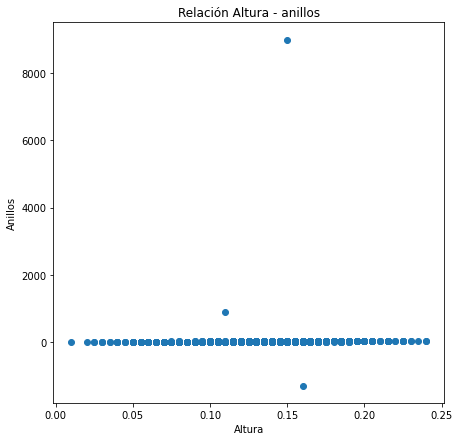

In [6]:
# distribución del precio y el área de construcción.
# Observe los datos atípicos

def plot_data(df, col_x, col_y, label_x, label_y, val_title):
    # Imprime gráfica de dispersión. 
    
    plt.figure(figsize=(7,7))
    plt.scatter(x=df[col_x],y=df[col_y])
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(val_title)
    plt.show()
    
plot_data(df,'Height', 'Rings', 'Altura','Anillos',
          'Relación Altura - anillos')    

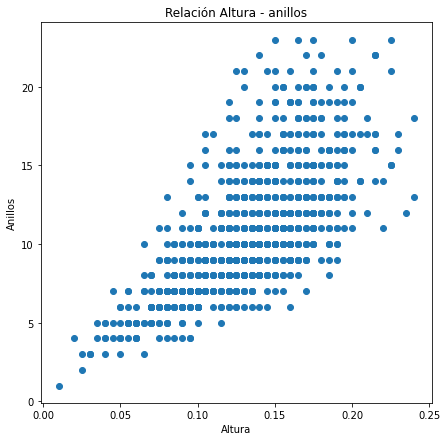

In [7]:
# Podemos eliminar filas de datos atípicos

df=df[df.Rings > 0]
df=df[df.Rings <= 25]


plot_data(df,'Height', 'Rings', 'Altura','Anillos',
          'Relación Altura - anillos') 

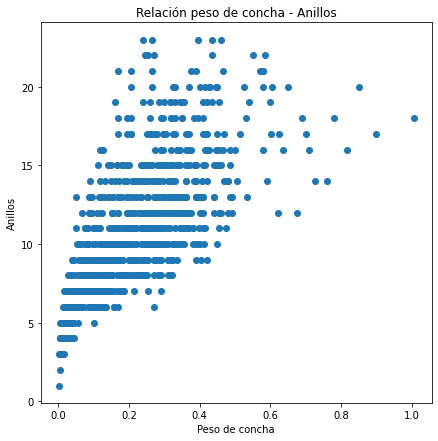

In [8]:
# Relación Anillos y Peso de concha

plot_data(df,'Shellweight', 'Rings', 'Peso de concha','Anillos',
          'Relación peso de concha - Anillos') 

In [9]:
# Estadísticas de los datos 
pd.set_option('display.float_format', lambda x: '%.2f' % x)

df.describe()

,Length,Diameter,Height,Whole,Viscera,Shellweight,Rings
count,982.00,982.00,982.00,982.00,982.00,982.00,982.00
mean,0.49,0.38,0.13,0.71,0.15,0.22,10.85
std,0.12,0.10,0.04,0.45,0.10,0.14,4.01
min,0.07,0.06,0.01,0.00,0.00,0.00,1.00
25%,0.41,0.32,0.10,0.35,0.07,0.10,8.00
50%,0.51,0.40,0.14,0.66,0.15,0.20,10.00
75%,0.58,0.46,0.16,1.00,0.22,0.30,13.00
max,0.74,0.60,0.24,2.83,0.54,1.00,23.00


#### Matriz de calor

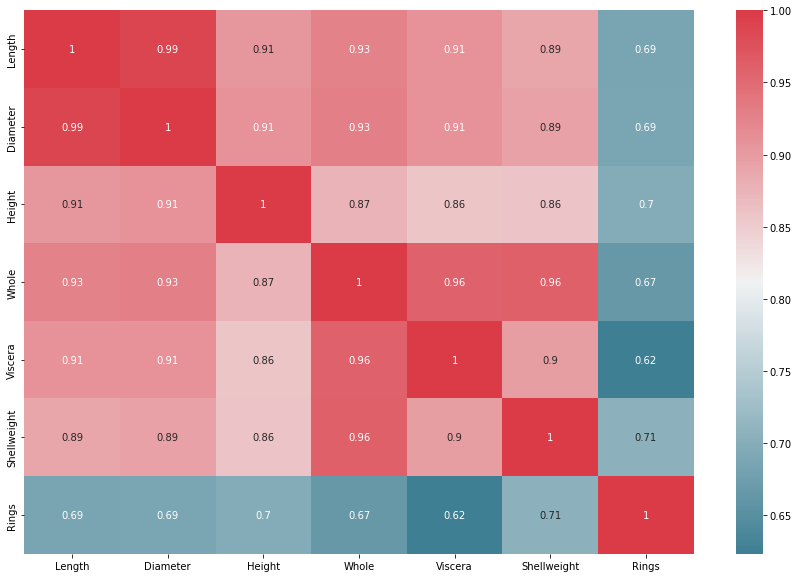

In [10]:
def correlation_heatmap(df1):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(df.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(df)

#### Eliminar valores no validos

In [11]:
# Preparación de los datos de las columnas que vamos a involucrar en el análisis

# Borrar los registros con valores nulos 
df = df[pd.notnull(df['Length'])]
df = df[pd.notnull(df['Diameter'])]
df = df[pd.notnull(df['Height'])]
df = df[pd.notnull(df['Whole'])]
df = df[pd.notnull(df['Viscera'])]
df = df[pd.notnull(df['Rings'])]

# Borrar los registro con valores en 0 donde no tienen sentido
df= df[df['Length'] != 0]
df= df[df['Diameter'] != 0]
df= df[df['Height'] != 0]
df= df[df['Whole'] != 0]
df= df[df['Viscera'] != 0]
df= df[df['Shellweight'] != 0]
df= df[df['Rings'] != 0]

# Estadísticas de los datos 
df.describe()

,Length,Diameter,Height,Whole,Viscera,Shellweight,Rings
count,982.00,982.00,982.00,982.00,982.00,982.00,982.00
mean,0.49,0.38,0.13,0.71,0.15,0.22,10.85
std,0.12,0.10,0.04,0.45,0.10,0.14,4.01
min,0.07,0.06,0.01,0.00,0.00,0.00,1.00
25%,0.41,0.32,0.10,0.35,0.07,0.10,8.00
50%,0.51,0.40,0.14,0.66,0.15,0.20,10.00
75%,0.58,0.46,0.16,1.00,0.22,0.30,13.00
max,0.74,0.60,0.24,2.83,0.54,1.00,23.00


#### Estadísticas de los datos 

In [12]:
df.describe()

,Length,Diameter,Height,Whole,Viscera,Shellweight,Rings
count,982.00,982.00,982.00,982.00,982.00,982.00,982.00
mean,0.49,0.38,0.13,0.71,0.15,0.22,10.85
std,0.12,0.10,0.04,0.45,0.10,0.14,4.01
min,0.07,0.06,0.01,0.00,0.00,0.00,1.00
25%,0.41,0.32,0.10,0.35,0.07,0.10,8.00
50%,0.51,0.40,0.14,0.66,0.15,0.20,10.00
75%,0.58,0.46,0.16,1.00,0.22,0.30,13.00
max,0.74,0.60,0.24,2.83,0.54,1.00,23.00


In [13]:
print(df.dtypes)

Length         float64
Diameter       float64
Height         float64
Whole          float64
Viscera        float64
Shellweight    float64
Rings            int64
dtype: object


### d) Defina el modelo utilizando un perceptrón multicapa implementado con PyTorch.

#### Definición del Set de Datos

In [14]:
# Definición de set de datos (Dataset)
class CSVDataset(Dataset):
    # Cargar el Dataset
    def __init__(self, df):
        # Eliminar primera fila
        df = df.iloc[1:]
        # Guardar las entradas y salidas
        self.X = df.values[:, :-1].astype('float32')
        self.y = df.values[:, -1].astype('float32')
        # Se asegura que el objetivo tenga la forma correcta
        self.y = self.y.reshape((len(self.y), 1))

    # Numero de filas en el Dataset
    def __len__(self):
        return len(self.X)

    # Obtener una fila en un indice
    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]

    # Obtener indices para filas de entrenamiento y pruebas
    def get_splits(self, n_test=0.33):
        # Determinar tamaños
        test_size = round(n_test * len(self.X))
        train_size = len(self.X) - test_size
        # Calcular la división
        return random_split(self, [train_size, test_size])

    
def prepare_data(df):
    # Carga los datos
    dataset = CSVDataset(df)
    # Calcula la división en datos de prueba y de entrenamiento
    train, test = dataset.get_splits()
    # Prepara los DataLoader
    train_dl = DataLoader(train, batch_size=32, shuffle=True)
    test_dl = DataLoader(test, batch_size=1024, shuffle=False)
    return train_dl, test_dl

def mse(TargetsAll, EstimatedTargetsAll):
    #Cálculo del error cuadrático medio
    #Recibe las caracteristicas
    #Recibe los estimados
    diff = TargetsAll - EstimatedTargetsAll
    return torch.sum(diff * diff) / diff.numel()

def evaluate_model(test_dl, model):
    """
    Evalua el rendimiento del modelo usando el Error Cuadratico Medio (MSE).
    """
    predictions, actuals = list(), list()
    for i, (inputs, targets) in enumerate(test_dl):
        # Evalua el modelo en los datos de prueba
        yhat = model(inputs)
        # Obtiene la matriz numpy
        yhat = yhat.detach().numpy()
        actual = targets.numpy()
        actual = actual.reshape((len(actual), 1))
        # Almacena
        predictions.append(yhat)
        actuals.append(actual)
    predictions, actuals = vstack(predictions), vstack(actuals)
    # Calcula el error cuadratico medio
    mse = mean_squared_error(actuals, predictions)
    return mse


def predict(row, model):
    # Convierte una fila a datos
    row = Tensor([row])
    # Hace la predicción
    yhat = model(row)
    # Recupera la matriz de numpy
    yhat = yhat.detach().numpy()
    return yhat


#### Definición de modelo

In [15]:
class MLP(Module):
    # Define los elementos del modelo
    def __init__(self, n_inputs, n_output):
        super(MLP, self).__init__()
        # Entrada de la primera capa
        self.hidden1 = Linear(n_inputs, 10)
        xavier_uniform_(self.hidden1.weight)
        self.act1 = Sigmoid()
        # Entrada de la segunda capa
        self.hidden2 = Linear(10, 8)
        xavier_uniform_(self.hidden2.weight)
        self.act2 = Sigmoid()
        # Tercera capa y salida
        self.hidden3 = Linear(8, n_output)
        xavier_uniform_(self.hidden3.weight)

    def forward(self, X):
        # Primera capa
        X = self.hidden1(X)
        X = self.act1(X)
        # Segunda capa
        X = self.hidden2(X)
        X = self.act2(X)
        # Tercera capa y salida
        X = self.hidden3(X)
        return X

### e) Entrenamiento del modelo

In [16]:
def train_model(train_dl, model):
    """
    Train the model using the train data loader (train_dl).
    """
    
    # define the optimization
    # Mean Squared Error (MSE)
    criterion = MSELoss()
    # Stochastic gradient descent (SGD)
    optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
    # enumerate epochs
    for epoch in range(100):
        # enumerate mini batches
        for i, (inputs, targets) in enumerate(train_dl):
            # clear the gradients
            optimizer.zero_grad()
            # compute the model output
            yhat = model(inputs)
            # calculate loss
            loss = criterion(yhat, targets)
            # credit assignment
            loss.backward()
            # update model weights
            optimizer.step()

In [17]:
# Preparar los datos
path = 'Abalone.csv'
train_dl, test_dl = prepare_data(df)
print(len(train_dl.dataset), len(test_dl.dataset))
print(train_dl)

# Definir la red
n_inputs = 6
n_output = 1
model = MLP( n_inputs, n_output)

# train the model
train_model(train_dl, model)

657 324


### f) Calculo de la perdida (MSE)

In [18]:
# evaluate the model using the Mean Squared Error (MSE)
mse = evaluate_model(test_dl, model)
print('Error (MSE): %.3f, RMSE: %.3f' % (mse, sqrt(mse)))

Error (MSE): 7.261, RMSE: 2.695


### g) Ejemplo


In [19]:
row = [0.64,0.5,0.185,1.3035,0.2635,0.465]
yhat = predict(row, model)
print('Predecido: %.3f' % yhat)

Predecido: 16.257


Se hace una predicción de un abalón con **0.73** de largo, **0.595** de diámetro, **0.23** de altura, **2.8255** de peso total, **0.419** de peso de las vísceras y **0.897** de peso de la concha, las medidas de largo, diámetro y altura están en **pies** y las medidas de peso en **gramos**.

Dado estos datos nuestro modelo nos dio la predicción de los anillos que tiene el abalón con esos datos, el dato correcto es **16**, con lo cual podemos ver que el valor que nos dio se aproxima mucho al valor verdadero, estando a tan solo décimas de la respuesta correcta.

### h) Conclusiones

1. Visualizar los datos en diagramas de dispersión puede ayudar mucho a encontrar datos atípicos que llegan a mal entrenar el modelo, con lo cual su precisión se ve severamente afectada.
2. La limpieza de los datos es muy importante, ya que unos pocos valores no válidos pueden llegar a hacer que el modelo no prediga bien los anillos.
3. Mientras más baja sea la perdida (MSE) mejor precisión tendrá nuestro modelo, si la perdida es muy alta lo más probable es que haya datos en la colección que estén arruinando la precisión del modelo, con lo cual hacer un análisis de los datos y su debido preprocesamiento puede ayudar enormemente a aumentar la precisión del modelo.

## Pregunta 4. Ajuste de curvas con mínimos cuadrados.
(requisito indispensable para tomar en cuenta el ejercicio, deben usar tensores de PyTorch).
- a) (5 puntos) Calcule el $w_{opt}$ (el w óptimo) para los datos de los abulones. 
- b) (5 puntos) Implemente la función forward, la cual estima las salidas del modelo al hacer  $f(x) =X\,\vec{w}_{opt}$ donde la función f(x) se refiere a la función de activación, con X la matriz de características.
- c) (5 puntos) Calcule la pérdida utilizando el error cuadrático medio.
- d) (3 puntos) Realice al menos tres conclusiones sobre el ejercicio.

In [20]:
#Cargo el csv
my_data= pd.read_csv('Abalone.csv')
#df.shape
#df.describe()

In [21]:
def plot_data(df, col_x, col_y, label_x, label_y, val_title):
    # Imprime gráfica de dispersión. 
    
    plt.figure(figsize=(7,7))
    plt.scatter(x=df[col_x],y=df[col_y])
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(val_title)
    plt.show()
    
#plot_data(my_data,'Height', 'Rings', 'Altura','Anillos','Relación Altura - anillos')

In [22]:
#Limpiar csv
#print(len(my_data))
filtro = my_data['Rings'] > 0
my_data = my_data[filtro]
filtro2 = my_data['Rings'] < 100
my_data = my_data[filtro2]

In [23]:
X = my_data[['Length', 'Diameter', 'Height', 'Whole', 'Viscera', 'Shellweight']].values
Y =  my_data[['Rings']].values
#print(X)
#print(Y)
#print(len(y))
# Data visualization
#plt.scatter(X, y)
print(len(my_data))

984


In [24]:
# a) Cálculo del  wopt  (el w óptimo) para los datos de los abulones.
 
def estimateOptimumW(targetsAll, SamplesAll):
    """ 
    Función para estimar los w óptimos
    parámetro TargetsAll, lo que se desea averiguar (edad)
    parámetro SamplesAll, caracteristícas 
    returno
       array de w óptimos
    """
    # Cálculo de w = Pseudoinversa*Targets
    samplesAllPinv = torch.tensor(np.linalg.pinv(SamplesAll))
    wOpt = samplesAllPinv.mm(targetsAll)
    return wOpt
 


# Convierto muestras y targets a tensores
targetsAll = torch.tensor(Y, dtype=torch.double)
SamplesAll = torch.tensor(X)

#print(targetsAll)
# Ajusto los tagets para poder multiplicarlos correctamente [1,2] -> [[1],[2]] 
targetsAll=targetsAll.reshape([targetsAll.shape[0],1])
#print(targetsAll)

# W óptimo 
wOpt = estimateOptimumW( targetsAll, SamplesAll)
print(wOpt)

tensor([[ 8.8573],
        [ 4.9964],
        [33.3816],
        [-4.1562],
        [-7.7736],
        [19.8859]], dtype=torch.float64)


In [25]:
# b) b) (5 puntos) Implemente la función forward, la cual estima las salidas del modelo al hacer  f(x)=Xw⃗ opt  donde la función f(x) se
# 2) Se estiman las salidas del modelo implementando la función forward 

def forward(SamplesAll, wOpt):
    """
    Obtener el modelo de salida
    parámetros: SamplesAll, matriz con los w óptimos 
    return: Un modelo de activación estimado
    """
    EstimatedTargets = SamplesAll.mm(wOpt)
    return EstimatedTargets

# Targets estimados para el modelo de ejemplo   
estimatedTargetsAll = forward(SamplesAll, wOpt)
#print(estimatedTargetsAll)

In [26]:
#c) (5 puntos) Calcule la pérdida utilizando el error cuadrático medio.

def mse(TargetsAll, EstimatedTargetsAll):
    #Cálculo del error cuadrático medio
    #Recibe las caracteristicas
    #Recibe los estimados
    diff = TargetsAll - EstimatedTargetsAll
    return torch.sum(diff * diff) / diff.numel() #numel es para que me tire resultado en tensores
  
error = mse(targetsAll, estimatedTargetsAll)
print(error)


tensor(7.5401, dtype=torch.float64)


### Conclusiones de ejercicio #4

- Hay que revisar las características de los datos ya que por ejemplo una de ellas es la cantidad de anillos, con solo esa información se puede deducir que esa cantidad siempre es mayor a 0. En la columna de anillos había un valor negativo, por tal razón siempre es recomendable realizar un preprocesamiento a  los datos antes de comenzar a trabajar.

- Verificar que las operaciones se puedan realizar con el tipo de datos que yo tengo, sino especificar con cuál tipo de dato se trabajará. Por ejemplo existiron problemas al tener unos datos de tipo flotante y otros de tipo entero, se tuvo que convertir los enteros a tipo double para que no hubiese problemas al trabajarlos.

- Mientras loss se acerque más a cero significará que la predicción es muy buena, de lo contrario se necesitará utilizar otra forma realizando otros ajustes como el de los pesos para mejorar o bajar ese loss.

## Pregunta 5. Implemente un perceptrón de una capa 

(requisito indispensable para tomar en cuenta el ejercicio, deben usar tensores de PyTorch).

- a)(10 puntos) Implemente el algoritmo del perceptrón de una capa rescindiendo al máximo de estructuras de tipo for, usando en su lugar operaciones matriciales. Debe implementarlo sin utilizar ninguna biblioteca, es decir en PyTorch no se puede usar ninguna clase o funcionalidad desarrollada por PyTorch o alguna otra biblioteca.
- b)(5 puntos) Utilice el perceptrón desarrollado en a) para realizar regresión con los datos de los abulones.
- c) (3 puntos) Realice al menos tres conclusiones sobre el ejercicio.

In [27]:
#a)(10 puntos) Implemente el algoritmo del perceptrón de una capa rescindiendo
#   al máximo de estructuras de tipo for, usando en su lugar operaciones matriciales.
#   Debe implementarlo sin utilizar ninguna biblioteca, es decir en PyTorch no se 
#   puede usar ninguna clase o funcionalidad desarrollada por PyTorch o alguna otra biblioteca.

def one_layer_perceptron(x_train_tensor, y_train_tensor, pesos, sesgos, predicciones):
  #Recibe una matriz de características targetsAll
  #Recibe un arreglo de lo que se desea saber SamplesAll
  #Recibe una matriz de características
  #Recibe un arreglo de resultados esperados

  # Factor de aprendizaje 
  lr = 0.01
  
  #Salida de la función, modelo
  predicciones = sesgos + pesos * x_train_tensor
    
  #Cálculo del error 
  error = y_train_tensor - predicciones
  
  # El gradiente calculado de forma manual
  sesgos_grad = -2 * error.mean()
  pesos_grad = -2 * (x_train_tensor * error).mean()
  

  # Se actualiza los parámetros 
  # Se necesita la opción NO_GRAD para no afectar el gráfo de computación dinámica 
  # que mantiene Pytorch.
  with torch.no_grad():
    sesgos -= lr * sesgos_grad
    pesos -= lr * pesos_grad  
  
  return [pesos,sesgos,predicciones]

In [28]:

#)(5 puntos) Utilice el perceptrón desarrollado en a) para realizar regresión con los datos de los abulones.

#Datos que contienen las características o parámetros que me ayudarán a entrenar
x_train_tensor = SamplesAll
#Salidas esperadas deacuerdo a las entradas
y_train_tensor = targetsAll

#Genero pesos aleatorios para ir modificandolos
pesos = torch.rand(len(SamplesAll[0]),requires_grad=True, dtype=torch.double)

#Genero un valor sesgo para realizar el ajuste de los pesos.
#Es un fenómeno que sesga el resultado de un algoritmo a favor o en contra de una idea.
sesgos = torch.rand(1, requires_grad=True, dtype=torch.double)

#Lista para guardar mis preddicciones conforme la entreno
predicciones = []

In [29]:
#Comenzar a entrenar
epochs = 10000
for _ in range(epochs):
  #Guardo el resultado de la iteración
  res = one_layer_perceptron(x_train_tensor, y_train_tensor, pesos, sesgos, predicciones)
  
  #Actualizo mis pesos
  pesos = res[0]
  
  #Actualizo mis sesgos
  sesgos = res[1]

  #Actualizo mis predicciones
  predicciones = res[2]
  #print(predicciones)


resul = mse(predicciones,y_train_tensor)
print(resul)

tensor(14.6684, dtype=torch.float64, grad_fn=<DivBackward0>)


### Conclusiones ejercicio #5
- Se logró aprender que no es necesario realizar muchos ciclos o epochs dentro del ciclo de entrenamiento, sino que hay que ir calculando cúal es un número adecuado para que los resultados del ciclo de entrenamiento converja.

- Se profundizó más el concepto de perceptrón y cómo este se asimila a una neurona humana en donde tenemos que ir ajustando sus parámetros poco a poco para entrenarla y que pueda reaccionar más eficientemente a sus entradas.

- Comprendimos que hay que estar observando el proceso de entrenamiento ya sea por medio de gráficos o mostrando en pantalla resultados parciales, con el fin de poder ajustar adecuadamente los parámetros de entrenamiento de la neurona y con ende poder maximizar la eficiencia del algoritmo sin gastos de recursos innecesarios.

# Referencias
[1] Google Colaboratory. (2022). Recuperado de https://colab.research.google.com/github/HaydeePeruyero/Geometria-Analitica-1/blob/master/3_1_Graficar_con_Sympy.ipynb

[2] Youtube. (2022). Recuperado de https://youtu.be/-_A_AAxqzCg

[3] Perceptron, S. (2022). Single Layer Perceptron | Complete Guide to Single Layer Perceptron. Recuperado de https://www.educba.com/single-layer-perceptron/

[4] Mendes, R. (2018). Abalone Dataset. Kaggle. Recuperado de https://www.kaggle.com/datasets/rodolfomendes/abalone-dataset?resource=download.